In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
d=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mydata.csv")
pd.set_option('display.max_columns', None)
# to display all columns in the dataset
#pd.set_option('display.max_rows', None)

In [ ]:
df=pd.DataFrame(d)
df

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),"Wind speed Sensor 2, Standard deviation (m/s)","Wind speed Sensor 2, Minimum (m/s)","Wind speed Sensor 2, Maximum (m/s)",Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),"Wind direction, Standard deviation (°)","Wind direction, Minimum (°)","Wind direction, Maximum (°)","Nacelle position, Standard deviation (°)","Nacelle position, Minimum (°)","Nacelle position, Maximum (°)",Vane position 1+2 (°),"Vane position 1+2, Max (°)","Vane position 1+2, Min (°)","Vane position 1+2, StdDev (°)",Energy Export (kWh),Energy Export counter (kWh),Energy Import (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Virtual Production (kWh),Power (kW),Potential power default PC (kW),"Power, Standard deviation (kW)","Power, Minimum (kW)","Power, Maximum (kW)",Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Turbine Power setpoint (kW),Potential power MPC (kW),Potential Power Energy Budget (kW),"Turbine Power setpoint, Max (kW)","Turbine Power setpoint, Min (kW)","Turbine Power setpoint, StdDev (kW)",Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),Unnamed: 53,Power factor (cosphi),"Power factor (cosphi), Max","Power factor (cosphi), Min","Power factor (cosphi), Standard deviation",Reactive power (kvar),"Reactive power, Max (kvar)","Reactive power, Min (kvar)","Reactive power, Standard deviation (kvar)",Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),"Front bearing temperature, Max (°C)","Front bearing temperature, Min (°C)","Front bearing temperature, Standard deviation (°C)","Rear bearing temperature, Max (°C)","Rear bearing temperature, Min (°C)","Rear bearing temperature, Standard deviation (°C)",Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temperature (°C),"Nacelle temperature, Max (°C)","Nacelle temperature, Min (°C)","Generator bearing front temperature, Max (°C)","Generator bearing front temperature, Min (°C)","Generator bearing rear temperature, Max (°C)","Generator bearing rear temperature, Min (°C)","Generator bearing front temperature, Std (°C)","Generator bearing rear temperature, Std (°C)","Nacelle temperature, Standard deviation (°C)","Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)","Hub temperature, min (°C)","Hub temperature, max (°C)","Hub temperature, standard deviation (°C)","Ambient temperature (converter), Max (°C)","Ambient temperature (converter), Min (°C)","Ambient temperature (converter), StdDev (°C)","Gear oil inlet temperature, Max (°C)","Gear oil inlet temperature, Min (°C)","Gear oil inlet temperature, StdDev (°C)","Nacelle ambient temperature, Max (°C)","Nacelle ambient temperature, Min (°C)","Nacelle ambient temperature, StdDev (°C)","Rotor bearing temp, Max (°C)","Rotor bearing temp, Min (°C)","Rotor bearing temp, StdDev (°C)","CPU temperature, Max (°C)","CPU temperature, Min (°C)","CPU temperature, StdDev (°C)","Transformer cell temperature, Max (°C)","Transformer cell temperat

In [ ]:
df=df.drop(['Unnamed: 53'], axis=1)

In [ ]:
df.shape

(52560, 137)

In [ ]:
df=df.apply(lambda x: x.fillna(x.mean()))

In [ ]:
df.isnull().sum()

Wind speed (m/s)                         0
Wind speed, Standard deviation (m/s)     0
Wind speed, Minimum (m/s)                0
Wind speed, Maximum (m/s)                0
Long Term Wind (m/s)                     0
                                        ..
Temperature motor axis 2, Min (°C)       0
Temperature motor axis 2, StdDev (°C)    0
Temperature motor axis 3, Max (°C)       0
Temperature motor axis 3, Min (°C)       0
Temperature motor axis 3, StdDev (°C)    0
Length: 137, dtype: int64

In [ ]:
temp=df[["Front bearing temperature (°C)"]]

In [ ]:
temp

,Front bearing temperature (°C)
0,67.534999
1,70.333334
2,73.975864
3,69.183871
4,67.589656
...,...
52555,71.971668
52556,69.255001
52557,73.725001
52558,71.519999


In [ ]:
x=temp.values.tolist()

In [ ]:
x

[[67.53499934],
 [70.33333384],
 [73.97586375],
 [69.18387112],
 [67.58965591],
 [72.74333369],
 [72.70370342],
 [68.10166601],
 [68.81666692],
 [74.07500025],
 [70.23666611],
 [69.83333384],
 [74.3896537],
 [69.77666575],
 [68.59833323],
 [73.62166672],
 [71.36000086],
 [67.88965554],
 [72.98461533],
 [71.6683342],
 [68.79833323],
 [73.95333201],
 [70.62166672],
 [68.91000036],
 [74.01333415],
 [70.1666659],
 [69.37833354],
 [74.11896462],
 [70.65000021],
 [67.89166768],
 [73.23166707],
 [71.37166621],
 [67.59333344],
 [71.38833338],
 [73.19333394],
 [68.48103464],
 [68.21333415],
 [73.68499883],
 [69.73166631],
 [68.33333257],
 [73.84166692],
 [70.68666738],
 [69.66999944],
 [73.97833328],
 [69.13166682],
 [70.11333415],
 [74.00666606],
 [69.02166595],
 [70.92999969],
 [73.6616656],
 [68.85999908],
 [73.01666641],
 [71.78500061],
 [67.90000076],
 [70.31499939],
 [73.81499964],
 [68.84833374],
 [68.68166707],
 [73.75416692],
 [61.373662658053306],
 [70.42999954],
 [73.59000041],
 [72.

In [ ]:
t = [j for sub in x for j in sub]
t

[67.53499934,
 70.33333384,
 73.97586375,
 69.18387112,
 67.58965591,
 72.74333369,
 72.70370342,
 68.10166601,
 68.81666692,
 74.07500025,
 70.23666611,
 69.83333384,
 74.3896537,
 69.77666575,
 68.59833323,
 73.62166672,
 71.36000086,
 67.88965554,
 72.98461533,
 71.6683342,
 68.79833323,
 73.95333201,
 70.62166672,
 68.91000036,
 74.01333415,
 70.1666659,
 69.37833354,
 74.11896462,
 70.65000021,
 67.89166768,
 73.23166707,
 71.37166621,
 67.59333344,
 71.38833338,
 73.19333394,
 68.48103464,
 68.21333415,
 73.68499883,
 69.73166631,
 68.33333257,
 73.84166692,
 70.68666738,
 69.66999944,
 73.97833328,
 69.13166682,
 70.11333415,
 74.00666606,
 69.02166595,
 70.92999969,
 73.6616656,
 68.85999908,
 73.01666641,
 71.78500061,
 67.90000076,
 70.31499939,
 73.81499964,
 68.84833374,
 68.68166707,
 73.75416692,
 61.373662658053306,
 70.42999954,
 73.59000041,
 72.21333338,
 68.38000005,
 71.6149999,
 73.47333374,
 73.45,
 68.79310319,
 72.19999949,
 74.15166626,
 72.41499939,
 69.850000

In [ ]:
w_size=30 # so window length is 30 and no of windows is 1752
j=0
i=0
l=0
M=0 # for collecting mean value
S=0 # for collecting standard deviation
mean=[]# collecting mean values of 1000 points so in total 5000 means
stand=[]
y=[] # for collecting those points for mean

for i in range(0,1752,1):
    M=np.mean(t[j:w_size])
    S=np.std(t[j:w_size])
    mean.append(M)
    stand.append(S)
    M=0
    S=0
    j+=30
    w_size+=30

In [ ]:
print("length of mean ",len(mean))

length of mean  1752


In [ ]:
alpha=3
w_size=30
k=0
j=0
i=0
label=[] # list for holding labels
for i in range(0,1752,1):
    for j in range(w_size):
        if j < len(mean) and j < len(stand):
            ut = mean[i] + alpha * stand[i]
            lt = mean[i] - alpha * stand[i]
            if lt < t[j] < ut:
                label.append(0)

            else:
                label.append(1)

In [ ]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
len(label)

52560

In [ ]:
df['class labels']=label
df

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),"Wind speed Sensor 2, Standard deviation (m/s)","Wind speed Sensor 2, Minimum (m/s)","Wind speed Sensor 2, Maximum (m/s)",Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),"Wind direction, Standard deviation (°)","Wind direction, Minimum (°)","Wind direction, Maximum (°)","Nacelle position, Standard deviation (°)","Nacelle position, Minimum (°)","Nacelle position, Maximum (°)",Vane position 1+2 (°),"Vane position 1+2, Max (°)","Vane position 1+2, Min (°)","Vane position 1+2, StdDev (°)",Energy Export (kWh),Energy Export counter (kWh),Energy Import (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Virtual Production (kWh),Power (kW),Potential power default PC (kW),"Power, Standard deviation (kW)","Power, Minimum (kW)","Power, Maximum (kW)",Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Turbine Power setpoint (kW),Potential power MPC (kW),Potential Power Energy Budget (kW),"Turbine Power setpoint, Max (kW)","Turbine Power setpoint, Min (kW)","Turbine Power setpoint, StdDev (kW)",Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),Power factor (cosphi),"Power factor (cosphi), Max","Power factor (cosphi), Min","Power factor (cosphi), Standard deviation",Reactive power (kvar),"Reactive power, Max (kvar)","Reactive power, Min (kvar)","Reactive power, Standard deviation (kvar)",Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),"Front bearing temperature, Max (°C)","Front bearing temperature, Min (°C)","Front bearing temperature, Standard deviation (°C)","Rear bearing temperature, Max (°C)","Rear bearing temperature, Min (°C)","Rear bearing temperature, Standard deviation (°C)",Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temperature (°C),"Nacelle temperature, Max (°C)","Nacelle temperature, Min (°C)","Generator bearing front temperature, Max (°C)","Generator bearing front temperature, Min (°C)","Generator bearing rear temperature, Max (°C)","Generator bearing rear temperature, Min (°C)","Generator bearing front temperature, Std (°C)","Generator bearing rear temperature, Std (°C)","Nacelle temperature, Standard deviation (°C)","Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)","Hub temperature, min (°C)","Hub temperature, max (°C)","Hub temperature, standard deviation (°C)","Ambient temperature (converter), Max (°C)","Ambient temperature (converter), Min (°C)","Ambient temperature (converter), StdDev (°C)","Gear oil inlet temperature, Max (°C)","Gear oil inlet temperature, Min (°C)","Gear oil inlet temperature, StdDev (°C)","Nacelle ambient temperature, Max (°C)","Nacelle ambient temperature, Min (°C)","Nacelle ambient temperature, StdDev (°C)","Rotor bearing temp, Max (°C)","Rotor bearing temp, Min (°C)","Rotor bearing temp, StdDev (°C)","CPU temperature, Max (°C)","CPU temperature, Min (°C)","CPU temperature, StdDev (°C)","Transformer cell temperature, Max (°C)","Transformer cell temperature, Min (°C

In [ ]:
X=df[['Wind speed (m/s)','Power (kW)','Front bearing temperature (°C)','Rear bearing temperature (°C)','Nacelle temperature (°C)','Gear oil inlet temperature (°C)','Gear oil temperature (°C)','Rotor bearing temp (°C)','Gear oil inlet temperature, StdDev (°C)']]

In [ ]:
X

,Wind speed (m/s),Power (kW),Front bearing temperature (°C),Rear bearing temperature (°C),Nacelle temperature (°C),Gear oil inlet temperature (°C),Gear oil temperature (°C),Rotor bearing temp (°C),"Gear oil inlet temperature, StdDev (°C)"
0,13.627191,2037.502873,67.534999,60.026667,9.090000,32.038333,55.500000,28.950000,0.540013
1,13.495296,2010.745451,70.333334,61.261667,9.563333,49.581667,57.315000,28.990000,5.584599
2,12.995932,1974.779594,73.975864,63.718966,9.668965,45.624137,59.187931,29.093104,10.732561
3,12.508251,1958.147563,69.183871,61.275807,9.111667,32.253333,56.361290,29.053226,0.298590
4,14.027196,2016.503349,67.589656,59.813793,9.146667,36.763333,55.520689,29.043103,7.385289
...,...,...,...,...,...,...,...,...,...
52555,10.503650,1555.897095,71.971668,62.066667,14.275000,31.608333,56.868333,31.758333,2.067732
52556,10.074575,1348.674803,69.255001,60.156667,14.053333,36.563334,55.525000,31.845000,8.260760
52557,10.264610,1414.735852,73.725001,62.945000,14.336667,52.400000,58.526667,31.983333,4.417390
52558,9.741830,1373.458518,71.519999,61.678333,13.936666,30.828333,56.368333,32.111666,1.403192


In [ ]:
Y=df[['class labels']]
Y

,class labels
0,0
1,0
2,0
3,0
4,0
...,...
52555,0
52556,0
52557,0
52558,0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have a dataset X (features) and y (labels/targets)

# Step 1: Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Check the shapes of the resulting sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)


Training set shapes: (42048, 9) (42048, 1)
Validation set shapes: (5256, 9) (5256, 1)
Testing set shapes: (5256, 9) (5256, 1)


In [ ]:
y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

Epoch 1/10
1314/1314 [==============================] - 10s 4ms/step - loss: 0.6396 - accuracy: 0.7740 - val_loss: 0.5355 - val_accuracy: 0.7979
Epoch 2/10
1314/1314 [==============================] - 4s 3ms/step - loss: 0.4475 - accuracy: 0.7905 - val_loss: 0.3948 - val_accuracy: 0.7957
Epoch 3/10
1314/1314 [==============================] - 4s 3ms/step - loss: 0.4184 - accuracy: 0.7962 - val_loss: 0.3804 - val_accuracy: 0.8103
Epoch 4/10
1314/1314 [==============================] - 4s 3ms/step - loss: 0.4016 - accuracy: 0.8058 - val_loss: 0.3673 - val_accuracy: 0.8019
Epoch 5/10
1314/1314 [==============================] - 4s 3ms/step - loss: 0.3861 - accuracy: 0.8113 - val_loss: 0.3727 - val_accuracy: 0.8149
Epoch 6/10
1314/1314 [==============================] - 4s 3ms/step - loss: 0.3673 - accuracy: 0.8149 - val_loss: 0.3656 - val_accuracy: 0.8042
Epoch 7/10
1314/1314 [==============================] - 4s 3ms/step - loss: 0.3615 - accuracy: 0.8169 - val_loss: 0.3590 - val_accuracy

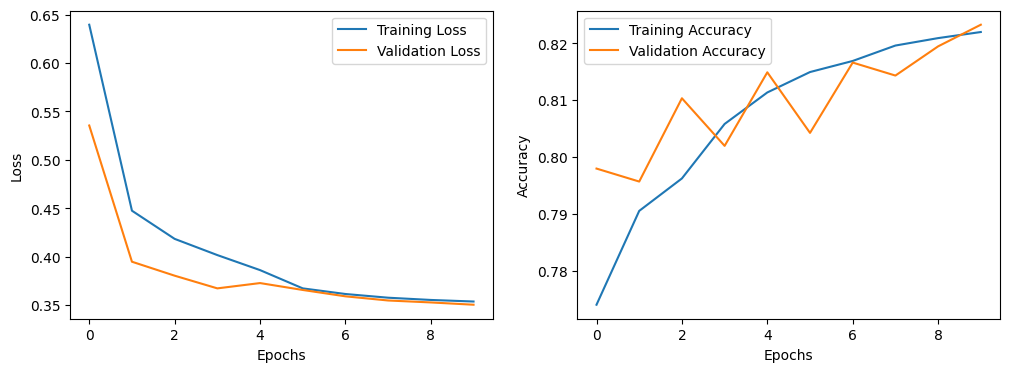

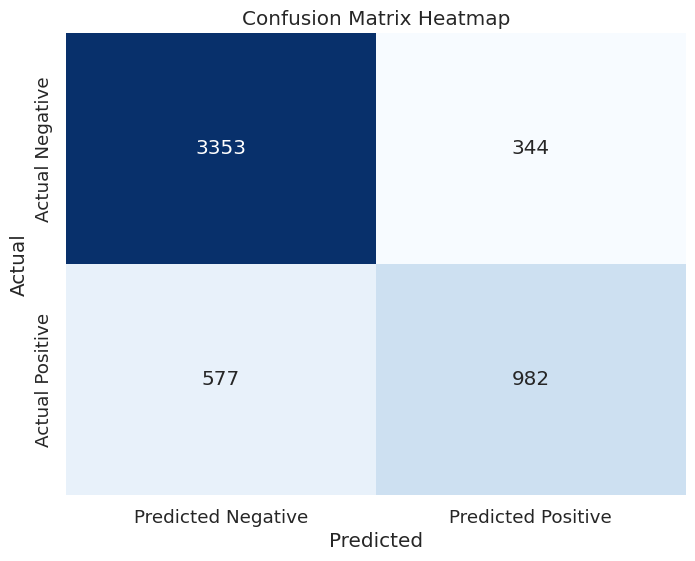

In [ ]:
# Step 2: Define and compile a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model on the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

# Step 4: Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 5: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Step 6: Display the confusion matrix
print("Confusion Matrix (Test Set):\n", conf_matrix)

# Step 7: Optionally, plot training and validation loss and accuracy over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)


165/165 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8248


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)
# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(report_test )

Precision: 0.6893089190785587
Recall: 0.7485567671584349
F1 Score: 0.7177121771217712
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3697
           1       0.69      0.75      0.72      1559

    accuracy                           0.83      5256
   macro avg       0.79      0.80      0.80      5256
weighted avg       0.83      0.83      0.83      5256

